# Vectors in the 2D plane

## Contents
TBD

## Introduction

Vectors are objects that live in multi-dimensional spaces. They have their own notions of arithmetic (adding, multiplying, ...).

In this chapter, we deal with 2D vectors.

## Picturing 2D vectors

In Math terms, the 2D space is referred to as a **plane**. 

Locations in the *plane* are identified by their vertical and horizontal positions, typically referred to a reference point: the **origin** of the plane.

> A **2D vector** is a point in the plane relative to the **origin**.

Alternatively, you can think of a vector as a straight arrow in the plane.

2D vectors are represented laying out in the plane two perpendicular axes that intersect at the origin of the plane. The horizontal axis (singular of axes) is called the **x-axis** and the vertical **axis** is called the **y-axis**.

A point in the plane is identified by its **x** and **y** coordinates which gives us where the point lines up with x and y axes.

We typically write coordinates as an ordered pair (or tuple) with the x-coordinate first, and y-coordinate second, for example $(6, 4)$.

### 2D drawing in Python

We will be using a small set of custom-built functions to create drawings, built on top of `Matplotlib`. That will let us draw build 2D images using vector data.

The following table lists some Python classes representing geametric figures. All of them can be used with a function called `draw()` that takes them as input.

| Class | Constructor Example | Description |
| :---- | :------------------ | :---------- |
| `Polygon` | `Polygon(*vectors)` | Represents a polygon whose vertices are identified by a list of vectors. |
| `Points` | `Points(*vectors)` | Represent a list of points to draw. |
| `Arrow` | `Arrow(tip, [tail])` | Represents an arrow from the origin to the tip of the vector, or from the tail vector to the tip vector if `tail` is given. |
| `Segment` | `Segment(start, end)` | Represents a line segment from the start vector to the end vector. |

There are few extra options you can pass to the `draw()` function:
+ `grid=(x_unit, y_unit)` &mdash; use x_unit, y_unit values for each of the x-axis and y-axis unit step
+ `nice_aspect_ratio` &mdash; instructs `draw()` not to keep the x-axis and y-axis scales the same

Let's see it in action by drawing the points. First of all, to avoid having different versions of the drawing library we include the location of the library in the path with the following trick.

Additionally, we need to adjust Pylance settings so that the same directory is made known to it.

In [1]:
import sys
sys.path.append('../e02-vector-drawing-lib/')


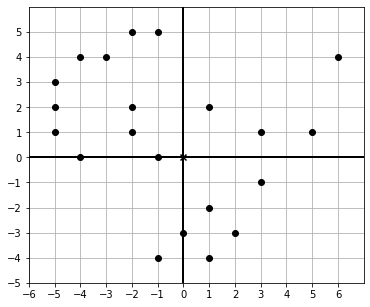

In [2]:

from my_vector_drawing_lib import draw, Points

dino_points = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0),
                        (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]

draw(
    Points(*dino_points)
)


## Plane vector arithmetic

In this section, we will discuss arithmetic opearations with 2D vectors (on the plane) and explore their geometric meaning.



### Vector addition

Given two vectors $ v_{1} = (v1_{x}, v1_{y}) $, and $ v_{2} = (v2_{x}, v2_{y}) $:

$$ v_{1} + v_{2} = (v1_{x} + v2_{x}, v1_{y} + v2_{y}) $$

Thus, we can define a function that performs the sum of two vectors as:

In [3]:
def add(v1, v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

And we can validate that the function works as expected:

In [4]:
v1 = (4, 3)
v2 = (-1, 1)
v_sum = add(v1, v2)

print(v_sum) # -> (3, 4)

(3, 4)


Let's draw `v1`, `v2` and `v_sum` to visualize them on the plane and understand the geometric significance of vector addition:

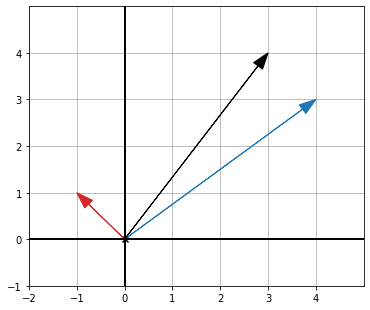

In [5]:
from my_vector_drawing_lib import draw, Arrow, BLUE, BLACK, RED

draw(
    Arrow(v1, color=BLUE),
    Arrow(v2, color=RED),
    Arrow(v_sum, color=BLACK)
)

At first sight, it might not seem to be evident, but if we look closely, we can see that the vector sum is the result of placing the tail of the red vector on the tip of the blue vector (and vice versa):

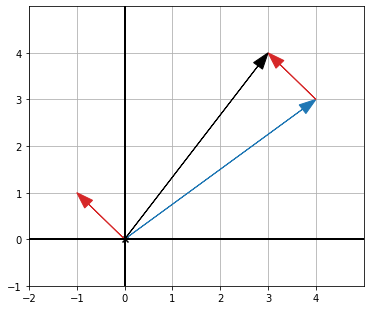

In [6]:
draw(
    Arrow(v1, color=BLUE),
    Arrow(v2, color=RED),
    Arrow(v_sum, v1, color=RED),
    Arrow(v_sum, color=BLACK)
)

We know that vectors can be either interpreted as arrows or points in the plane.

As a point in the plane, the vector addition tells us that you can reach the point of the vector sum by starting at position $ v_1 $ and then moving one unit to the left and one unit up.

That is, it is the same as we would traverse one arrow, and then traverse the second.

For this reason, the vector addition is sometimes called **tip-to-tail** addition.

In terms of arrows, the vector sum gives us the overall distance and direction you travel when you do the **tip-to-tail** addition journey.

![vector sum as net distance and direction](../images/vector_addition_as_net_distance_and_direction.png)

In geometry, vector addition is known as **translation**. That is, adding a vector to an existing one has the effect of *translating* (moving) the original vector by vector given as second parameter.

We can see the effect by applying a translation to our good old dino. We will perform the *translation* of the dino points to the left and to the bottom by adding `(1.5, -2.5)` to all the vectors that define the dinosaur shape.

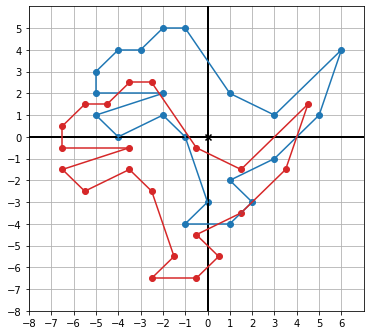

In [7]:
from my_vector_drawing_lib import draw, Points, Polygon

dino_points = [(6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0),
               (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1)]

translated_dino_points = [add((-1.5, -2.5), p) for p in dino_points]

draw(
    Points(*dino_points, color=BLUE),
    Polygon(*dino_points, color=BLUE),
    Points(*translated_dino_points, color=RED),
    Polygon(*translated_dino_points, color=RED)
)


You can see how the effect of adding `(-1.5, -2.5)` has moved the dinosaur 1.5 units to the left, and 2.5 units to the bottom.


We can even draw the actual arrows to see the effect:

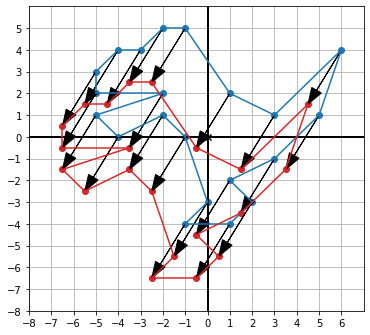

In [8]:
# this creates a list of arrows, each arrow pointing from the original dino point
# to the translated one
# zip(translated_dino_points, dino_points) = ((4.5, 1.5), (6, 4)), ((1.5, -1.5), (3, 1)),...
arrows = [Arrow(z[0], z[1], color=BLACK) for z in zip(translated_dino_points, dino_points)]

draw(
    Points(*dino_points, color=BLUE),
    Polygon(*dino_points, color=BLUE),
    Points(*translated_dino_points, color=RED),
    Polygon(*translated_dino_points, color=RED),
    *arrows
    )


### Vector components and lengths

Many times it's useful to decompose a vector as a sum of other *simpler* vectors. This also happens is real-life situations: it's more natural when using directions to say "go 4 blocks east, then 3 blocks north" than "go 800 meters northeast".

One of the simplest way to decompose a vector consists in using the base $ \{(1, 0), (0, 1)\} $. That is, for example:

$ (4, 3) = (4, 0) + (0, 3) $

These are typically called the **x** and **y** **components** of the vector.

The **length of the vector** is the length of the arrow that represents it. That is, the length of a vector is the distance from the origin of the plane to the point that represents it.

That can be easily calculated if you recall the *Pythagorean Theorem*:
> For a right triangle (a triangle having two sides meeting at a 90° angle), the square of the length of the longest side (hypotenuse) is the sum of the squares of the lengths of the other two sides.

$ a^{2} = b^{2} + c^{2} $

As any vector in the plane can be expressed as an addition $ (a, b) = (a, 0) + (0, b) $, and $ (a, 0) $ and $ (0, b) $ can be interpreted as the sides of a right triangle as seen below:

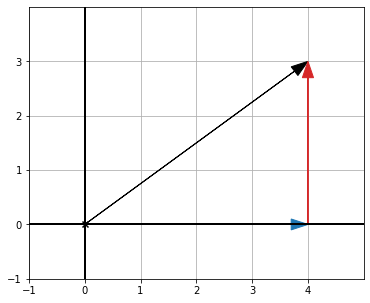

In [9]:
v = (4, 3)
v_x = (4, 0)
v_y = (0, 3)

draw(
    Arrow(v, color=BLACK),
    Arrow(v_x, color=BLUE),
    Arrow(v, v_x, color=RED)
)

From the picture above, we can arrive at the conclusion that using the *x* and *y* components of a vector, and the *tip-to-tail* property of the vector addition makes it really easy to compute the length of a vector:

$ length(v) = \sqrt{a^{2} + b^{2}} \text{, where } v=(a, b) $

This can also be expressed programmatically:

In [10]:
from math import sqrt

def length(v):
    return sqrt(v[0] ** 2 + v[1] ** 2)

So that, the legnth of the vector $ (4, 3) $ is $ 5 $.

In [11]:
length((4, 3))

5.0

### Scalar product &mdash; multiplying vectors by numbers

The result of adding a given vector $ v $ a certain number of times can be written with an *scalar product*:

$ v + v + v + v + v = 5 \cdot v $

This is truly appropriate, as ordinary numbers are often called *scalars*. Also doing an scalar product on a vector has the geometry effect of scaling the vector by that factor: multiplying a given vector $ v $ by $ 2.5 $ scales the dimensions of $ v $ $ 2.5 $ times.

The following diagram illustrates that fact:

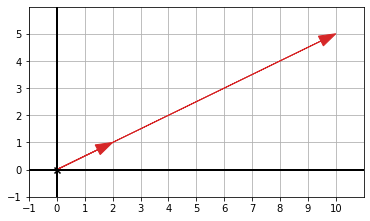

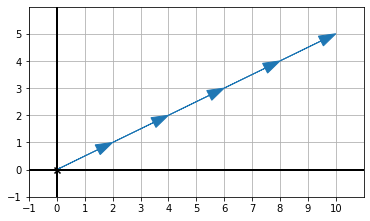

In [12]:
from my_vector_drawing_lib import Arrow, draw, BLUE, RED

v = (2, 1)
v_5 = add(add(add(add(v, v), v), v), v)
draw(Arrow(v), Arrow(v_5))

v_2 = add(v, v)
v_3 = add(v_2, v)
v_4 = add(v_3, v)
draw(
    Arrow(v, color=BLUE), 
    Arrow(v_2, v, color=BLUE), 
    Arrow(v_3, v_2, color=BLUE), 
    Arrow(v_4, v_3, color=BLUE), 
    Arrow(v_5, v_4, color=BLUE)
)

The result of *scalar multiplication* on a vector scales both of its components by the same factor:

$
v = (a, b) = (a, 0) + (0, b) \\
r \cdot v = r \cdot (a, b) = (r \cdot a, r \cdot b) = (r \cdot a, 0) + (0, r \cdot b) = r \cdot (a, 0) + r \cdot (0, b)
$

We can see it in the following diagram as well:

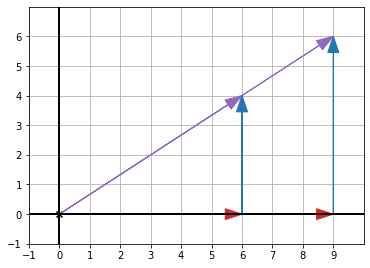

In [13]:
from my_vector_drawing_lib import PURPLE, RED


def scalar_product(scalar, v):
    return (scalar * v[0], scalar * v[1])


v = (6, 4)
v_mod = scalar_product(1.5, v)

draw(
    Arrow(v, color=PURPLE),         # original
    Arrow(v_mod, color=PURPLE),     # result of scalar product
    Arrow((6, 0), color=RED), Arrow(v, (6, 0), color=BLUE),
    Arrow((1.5 * 6, 0), color=RED), Arrow(v_mod, (1.5 * 6, 0), color=BLUE))

Multiplying a vector by a negative factor changes the direction of the original vector to point in the exact opposite direction.

This is illustrated below:

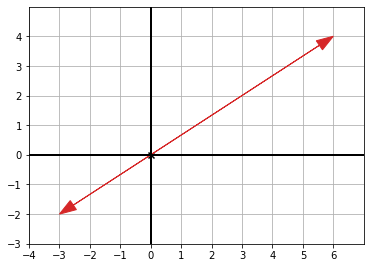

In [14]:
v_1 = (6, 4)
v_2 = scalar_product(-(1/2), v_1)

draw(Arrow(v_1), Arrow(v_2))

### The negative vector

Given a vector $ v $, the negative vector $ -v $, is the same as the scalar multiplication $ -1 \cdot v $.

This results in a vector which is the opposite of the one given, as seen below:

$
v = (-4, 3) \\
-v = -1 \cdot (-4, 3) = (-1 \cdot -4, -1 \cdot 3) = (4, -3)
$

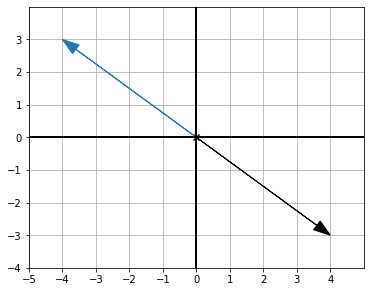

In [16]:
from my_vector_drawing_lib import draw, Arrow, BLACK, BLUE

def negative(v):
    return scalar_product(-1, v)

v = (-4, 3)

draw(
    Arrow(v, color=BLUE),
    Arrow(negative(v), color=BLACK)
)

### Vector subtraction &mdash; the displacement vector

Vector subtraction is defined on the concept of *negating* a vector:

$
Given \hspace{1ex} v = (a, b), w = (c, d) \\
v - w = v + (-w) = (a, b) + (-c, -d) = (a - c, b - d)
$

The following piece of code illustrates this operation and let us found the geometrical significance of the subtraction of two vectors.

Let's assume we have two vectors:

$
v=(-1, 3) \\
w=(2, 3)
$

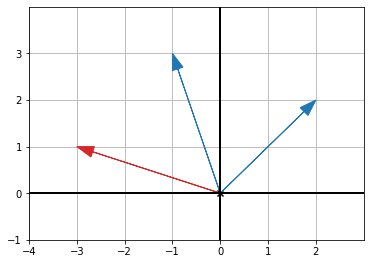

In [27]:
def subtract(v, w):
    return add(v, scalar_product(-1, w))

v = (-1, 3)
w = (2, 2)

draw(
    Arrow(v, color=BLUE),
    Arrow(w, color=BLUE),
    Arrow(subtract(v, w,), color=RED)
)

Just by looking at the image above it might not seem evident, but if we place the tail of the red vector (the subtraction vector) at the tip of $ w $, we can see that it will point to $ v $: 

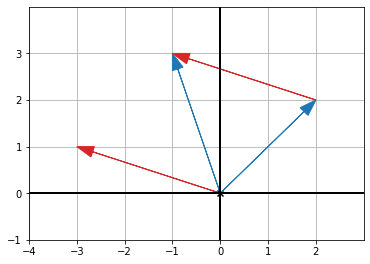

In [28]:
draw(
    Arrow(v, color=BLUE),
    Arrow(w, color=BLUE),
    Arrow(subtract(v, w,), color=RED),
    Arrow(add(subtract(v, w), w), w, color=RED)
)

That is, the difference between the vectors $ v $ and $ w $ gives us the distance between $ v $ and $ w $. This vector is sometimes called the **displacement** from $ w $ to $ v $.

The length of that segment can be calculated with the Pythagorean theorem:



(3, -1)
Distance between v and w = 3.1622776601683795


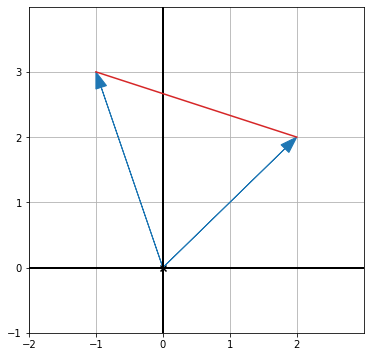

In [30]:
from my_vector_drawing_lib import Segment

v = (2, 2)
w = (-1, 3)

displacement_vector = subtract(v, w)
print(displacement_vector)
print(f'Distance between v and w = {length(displacement_vector)}')

draw(
    Arrow(v, color = BLUE),
    Arrow(w, color = BLUE),
    Segment(v, w, color = RED)
)

Note that while the **displacement** is a vector, the **distance** is a scalar. As a result, the distance on its own is not enough to specify how to get from $ w $ to $ v $ , as there are infinite points that have the same *distance* from $ w $.

To demonstrate this, let's calculate the formula that gives us all the points equidistant from $ w = (2, 2) $ and $ (-1, 3) $.

$
distance(v, (2, 2)) = distance((-1, 3), (2, 2)) \Rightarrow \\
distance(v, (2, 2)) = \sqrt{(-3)^2 + 1^2} \Rightarrow \\
distance(v, (2, 2)) = \sqrt{10} \Rightarrow \\
length((x - 2, y - 2)) = \sqrt{10} \Rightarrow \\
\sqrt{ (x - 2)^2 + (y - 2)^2 } = \sqrt{10} \Rightarrow \\
(x - 2)^2 + (y - 2)^2 = 10 \Rightarrow \\
$

Now we're ready to to clear $ y $ in terms of $ x $:

$
(y - 2)^2 = 10 - (x - 2)^2 \Rightarrow \\
y - 2 = \pm \sqrt{10 - (x - 2)^2} \Rightarrow \\
y = 2 \pm \sqrt{10 - (x - 2)^2} \Rightarrow \\
$

Therefore, 

$
\text{for } x = 1, \hspace{1ex} y=2 \pm 1 \begin{cases}
y = 3 \\
y = 1
\end{cases}
$

And:

$
\text{for } x = 3, \hspace{1ex} y=2 \pm 3 \begin{cases}
y = 5 \\
y = -1
\end{cases}
$

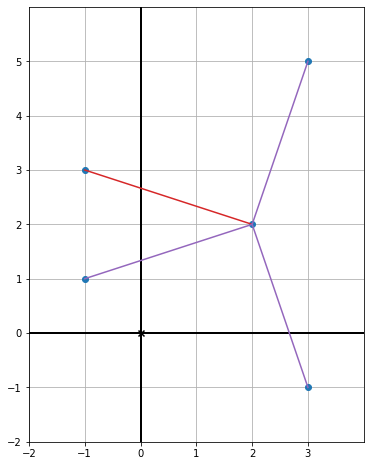

In [41]:
from my_vector_drawing_lib import PURPLE
draw(
    Points(
        (2, 2), 
        (-1, 3),
        (3, 5),
        (3, -1),
        (-1, 1), color=BLUE),
    Segment((2, 2), (-1, 3), color=RED),
    Segment((2, 2), (-1, 1), color=PURPLE),
    Segment((2, 2), (3, 5), color=PURPLE),
    Segment((2, 2), (3, -1), color=PURPLE)  
)